In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
traffic_dataset = pd.read_csv('TrafficTwoMonth.csv')

In [3]:
traffic_dataset['midday'] = ''
for i in range(len(traffic_dataset['Time'])):
  if traffic_dataset['Time'][i][-2:].endswith('AM'):
    traffic_dataset.loc[i, 'midday'] = 'AM'
  elif traffic_dataset['Time'][i][-2:].endswith('PM'):
    traffic_dataset.loc[i, 'midday'] = 'PM'

traffic_dataset['Time'] = traffic_dataset['Time'].str[:-2]

traffic_dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,normal,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,1:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
5948,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
5949,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
5950,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


In [4]:
traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
    pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
    pd.to_datetime(traffic_dataset['Time']).dt.second

C:\Users\User\AppData\Local\Temp\ipykernel_12856\2707208563.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
C:\Users\User\AppData\Local\Temp\ipykernel_12856\2707208563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
C:\Users\User\AppData\Local\Temp\ipykernel_12856\2707208563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.second


In [5]:
feature_except_target = traffic_dataset.drop(['Traffic Situation'], axis=1)
target_feature = traffic_dataset['Traffic Situation']

label_encoder = LabelEncoder()
feature_except_target['midday'] = label_encoder.fit_transform(feature_except_target['midday'])
feature_except_target['Day of the week'] = label_encoder.fit_transform(feature_except_target['Day of the week'])

numeric_features = ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'midday']
normalization_scaler = MinMaxScaler()
feature_except_target[numeric_features] = normalization_scaler.fit_transform(feature_except_target[numeric_features])

target_encoder = LabelEncoder()
target_feature = target_encoder.fit_transform(target_feature)

encoded_data_normalized = pd.concat([feature_except_target,  pd.Series(target_feature, name='Traffic Situation')], axis=1)

encoded_data_normalized

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,0.833333,0.045714,0.028571,0.04,0.400000,0.077519,0.0,3
1,0.957447,0.300000,0.833333,0.051429,0.014286,0.02,0.600000,0.120155,0.0,3
2,0.978723,0.300000,0.833333,0.028571,0.028571,0.04,0.533333,0.096899,0.0,3
3,1.000000,0.300000,0.833333,0.028571,0.028571,0.04,0.600000,0.112403,0.0,3
4,0.000000,0.300000,0.833333,0.034286,0.028571,0.02,0.566667,0.104651,0.0,3
...,...,...,...,...,...,...,...,...,...,...
5947,0.829787,0.266667,0.666667,0.062857,0.042857,0.02,0.600000,0.135659,1.0,3
5948,0.851064,0.266667,0.666667,0.034286,0.000000,0.02,0.500000,0.081395,1.0,3
5949,0.872340,0.266667,0.666667,0.057143,0.057143,0.02,0.416667,0.093023,1.0,3
5950,0.893617,0.266667,0.666667,0.062857,0.071429,0.00,0.450000,0.104651,1.0,3


In [6]:
traffic_data = encoded_data_normalized.iloc[:,0:9]

print(traffic_data)

traffic_target = encoded_data_normalized.iloc[:,9]

traffic_target

          Time      Date  Day of the week  CarCount  BikeCount  BusCount  \
0     0.936170  0.300000         0.833333  0.045714   0.028571      0.04   
1     0.957447  0.300000         0.833333  0.051429   0.014286      0.02   
2     0.978723  0.300000         0.833333  0.028571   0.028571      0.04   
3     1.000000  0.300000         0.833333  0.028571   0.028571      0.04   
4     0.000000  0.300000         0.833333  0.034286   0.028571      0.02   
...        ...       ...              ...       ...        ...       ...   
5947  0.829787  0.266667         0.666667  0.062857   0.042857      0.02   
5948  0.851064  0.266667         0.666667  0.034286   0.000000      0.02   
5949  0.872340  0.266667         0.666667  0.057143   0.057143      0.02   
5950  0.893617  0.266667         0.666667  0.062857   0.071429      0.00   
5951  0.914894  0.266667         0.666667  0.051429   0.042857      0.02   

      TruckCount     Total  midday  
0       0.400000  0.077519     0.0  
1       0.600

0       3
1       3
2       3
3       3
4       3
       ..
5947    3
5948    3
5949    3
5950    3
5951    2
Name: Traffic Situation, Length: 5952, dtype: int32

### **Model using relu, softmax, adam**

In [15]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder(sparse=False)
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1))
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1))

  y_train_encoder.shape

  model = Sequential()
  model.add(Dense(16, input_dim=2, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # print(model.summary())

  num_components = 2
  pca = PCA(n_components=num_components)
  x_train_pca = pca.fit_transform(X_train)
  x_test_pca = pca.transform(X_test)
  

  model.fit(x_train_pca, y_train_encoder, epochs=50, batch_size=8, verbose=0)
  _, accuracy_nn = model.evaluate(x_test_pca, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_nn}')
print(model.summary())

c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.7 accuracy score is: 0.7872340679168701


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.8 accuracy score is: 0.7850545644760132


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.9 accuracy score is: 0.7852349281311035
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                48        
                                                                 
 dense_11 (Dense)            (None, 4)                 68        
                                                                 
Total params: 116 (464.00 Byte)
Trainable params: 116 (464.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Model using tanh, sigmoid, rmsprop**

In [20]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder(sparse=False)
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1))
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1))

  y_train_encoder.shape

  model1 = Sequential()
  model1.add(Dense(16, input_dim=2, activation='relu'))
  model1.add(Dense(4, activation='softmax'))
  model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # print(model.summary())

  num_components = 2
  pca = PCA(n_components=num_components)
  x_train_pca = pca.fit_transform(X_train)
  x_test_pca = pca.transform(X_test)
  

  model1.fit(x_train_pca, y_train_encoder, epochs=50, batch_size=12, verbose=0)
  _, accuracy_nn = model1.evaluate(x_test_pca, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_nn}')
print(model1.summary())

c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.7 accuracy score is: 0.7844344973564148


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.8 accuracy score is: 0.7833753228187561


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.9 accuracy score is: 0.7785235047340393
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                48        
                                                                 
 dense_31 (Dense)            (None, 4)                 68        
                                                                 
Total params: 116 (464.00 Byte)
Trainable params: 116 (464.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Model using tanh, softmax, adam**

In [21]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder(sparse=False)
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1))
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1))

  y_train_encoder.shape

  model2 = Sequential()
  model2.add(Dense(16, input_dim=2, activation='tanh'))
  model2.add(Dense(4, activation='softmax'))
  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # print(model.summary())

  num_components = 2
  pca = PCA(n_components=num_components)
  x_train_pca = pca.fit_transform(X_train)
  x_test_pca = pca.transform(X_test)
  

  model2.fit(x_train_pca, y_train_encoder, epochs=50, batch_size=20, verbose=0)
  _, accuracy_nn = model2.evaluate(x_test_pca, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_nn}')
print(model2.summary())

c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.7 accuracy score is: 0.7844344973564148


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.8 accuracy score is: 0.784214973449707


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.9 accuracy score is: 0.7751677632331848
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                48        
                                                                 
 dense_37 (Dense)            (None, 4)                 68        
                                                                 
Total params: 116 (464.00 Byte)
Trainable params: 116 (464.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Relu, Sigmoid, Rmsprop**

In [22]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder(sparse=False)
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1))
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1))

  y_train_encoder.shape

  model3 = Sequential()
  model3.add(Dense(32, input_dim=2, activation='relu'))
  model3.add(Dense(4, activation='sigmoid'))
  model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  num_components = 2
  pca = PCA(n_components=num_components)
  x_train_pca = pca.fit_transform(X_train)
  x_test_pca = pca.transform(X_test)
  

  model3.fit(x_train_pca, y_train_encoder, epochs=50, batch_size=25, verbose=0)
  _, accuracy_nn = model3.evaluate(x_test_pca, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_nn}')
print(model3.summary())

c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.7 accuracy score is: 0.7793952822685242


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.8 accuracy score is: 0.786733865737915


c:\Users\User\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For ratio 0.9 accuracy score is: 0.7885906100273132
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                96        
                                                                 
 dense_43 (Dense)            (None, 4)                 132       
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


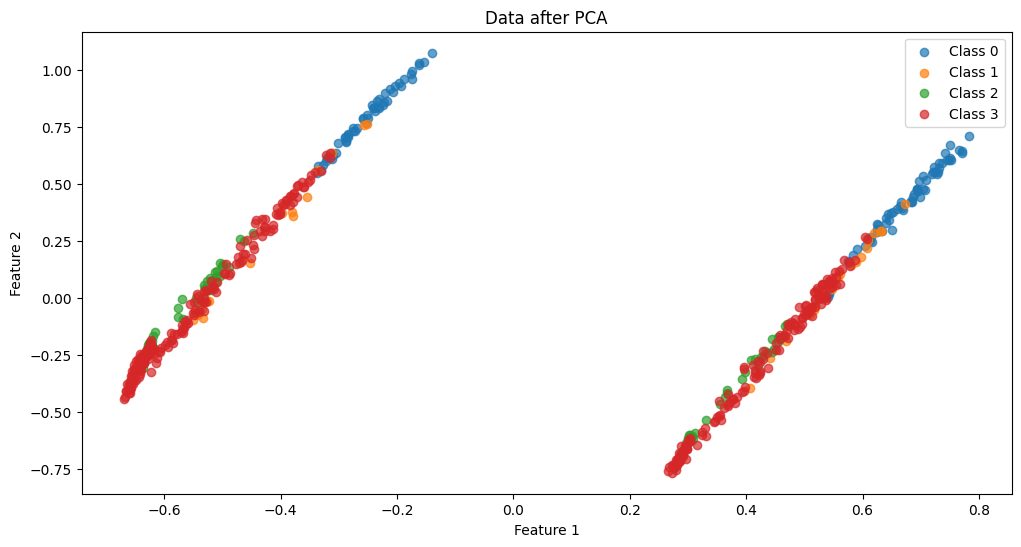

In [23]:
plt.figure(figsize=(12, 6))

for label in np.unique(y_test):
    indices = y_test == label
    plt.scatter(x_test_pca[indices, 0], x_test_pca[indices, 1], label=f'Class {label}', alpha=0.7)
plt.title('Data after PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

